<a href="https://colab.research.google.com/github/vkjadon/python/blob/main/scipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Solving Engineering Equations, Analytical solution is hard → numerical solution is practical.

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from scipy.optimize import fsolve

def equation(x):
    return x**3 - 4*x - 9

solution = fsolve(equation, 2)
print("Solution:", solution)


Solution: [2.70652795]


x0 → initial guess (engineering intuition!)

fsolve → Newton-like numerical solver Find the roots of a function.

Return the roots of the (non-linear) equations defined by
func(x) = 0 given a starting estimate.

In [ ]:
## Optimization (Design Problems)

Used in mechanical design, control tuning, economics

Objective function = cost / error / loss

Minimize power loss in a system

$P(x)=x^2+10 \times sin(x)$

minimize() can give a locally correct but globally wrong answer depending on the initial guess

In [ ]:
def power_loss(x):
    return x**2 + 10*np.sin(x)

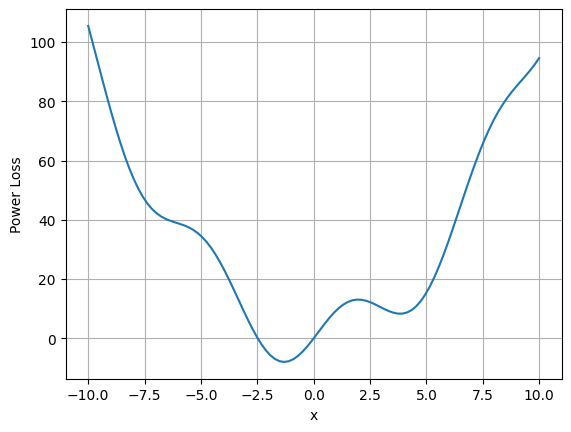

In [ ]:
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)

plt.plot(x, power_loss(x))
plt.xlabel("x")
plt.ylabel("Power Loss")
plt.grid()
plt.show()


The function is non-convex

Has multiple local minima

Uses gradient-based optimization by default

In [ ]:
from scipy.optimize import minimize
result = minimize(power_loss, x0=9)
print(result.x)

[3.83746712]


Used in mechanical design, control tuning, economics

Objective function = cost / error / loss

## Solving Differential Equations (Core Engineering Skill)

First-order system (RC circuit / thermal system)

$\frac{dy}{dt}= - 2y $

We can use `solve_ivp` to solve an initial value problem for a system of ODEs.

This function numerically integrates a system of ordinary differential equations given an initial value.

The goal is to find y(t) approximately satisfying the differential equations, given an initial value y=y0.

In [22]:
from scipy.integrate import solve_ivp

def model(t, y):
    return -2*y

sol = solve_ivp(model, [0, 5], [4,8])

# check y0 = [1], 1, (4), (5,8), [3,2], [1,3,5,9]

print(sol.t)
print(sol.y)


[0.         0.07578867 0.53974312 0.97767974 1.41725498 1.85679609
 2.29650263 2.73659062 3.17759046 3.62074452 4.06886835 4.52792172
 5.        ]
[[4.00000000e+00 3.43740568e+00 1.36005117e+00 5.66725446e-01
  2.35381576e-01 9.77691282e-02 4.05964352e-02 1.68439542e-02
  6.97607857e-03 2.87683677e-03 1.17468399e-03 4.69331325e-04
  1.82721408e-04]
 [8.00000000e+00 6.87481137e+00 2.72010234e+00 1.13345089e+00
  4.70763152e-01 1.95538256e-01 8.11928703e-02 3.36879085e-02
  1.39521571e-02 5.75367355e-03 2.34936798e-03 9.38662650e-04
  3.65442816e-04]]


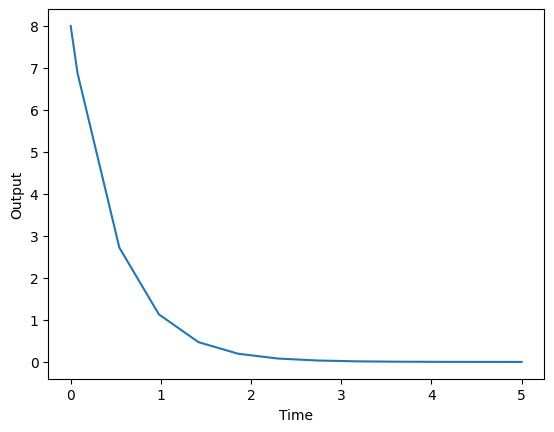

In [28]:
plt.plot(sol.t, sol.y[1])
plt.xlabel("Time")
plt.ylabel("Output")
plt.show()


Used in control systems, robotics, electronics

y(0) = 1 initial condition

Time response analysis

## Curve Fitting (Experimental Data Modeling)

Fit sensor data to a model:

$ y = a e^{−bt}$

`curve_fit()` essentially takes function, independent variable and dependent data as first three parameters. The callable function must take the independent variable as the first argument and the parameters to fit as separate remaining arguments.

In [ ]:
from scipy.optimize import curve_fit

def model(t, a, b):
    return a * np.exp(-b * t)

t = np.array([0,1,2,3,4])
y = np.array([10,6.1,3.7,2.2,1.3])

params, _ = curve_fit(model, t, y)
print("a, b =", params)


a, b = [10.01911669  0.50178783]


Real-world use:

Sensor calibration

Battery discharge

Material testing

## Linear Algebra for Engineering Systems

Solve simultaneous equations (circuit / statics)

$Ax=b$


`linalg.solve` the equation a @ x = b for x, where a is a square matrix.

If the data matrix is known to be a particular type then supplying the corresponding string to assume_a key chooses the dedicated solver

In [ ]:
from scipy.linalg import solve

A = np.array([[3, 2],
              [1, 2]])
b = np.array([5, 5])

x = solve(A, b)
print(x)


[0.  2.5]


## Filter noisy sensor signal



In [ ]:
from scipy.signal import butter, filtfilt

b, a = butter(2, 0.1)
signal = np.random.randn(100)
filtered = filtfilt(b, a, signal)